<a href="https://colab.research.google.com/github/maksarts/other_ML_projects/blob/main/%D0%9D%D0%98%D0%A0_7_%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты, загрузка датасета и начальные константы

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import pandas as pd
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def imshow(img):
    plt.figure(figsize=(10, 6))
    img = img / 2 + 0.5     # нормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([4, 3, 32, 32])


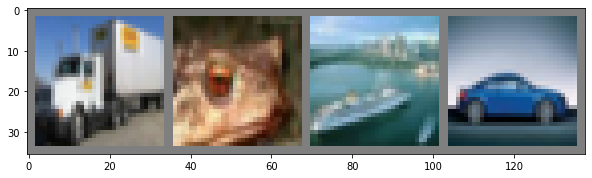

truck	 frog	 ship	  car


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# выводим картинки
imshow(torchvision.utils.make_grid(images))
# выводим метки
print('\t'.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Функции

In [ ]:
def StartTraining(net, trainloader, valloader, optimizer, criterion, epochs = 5):  
  losses = []
  x = []
  x2 = []
  vallosses = []
  j = 0
  k = 0

  for epoch in range(epochs): 

      running_loss = 0.0
      pltloss = 0.0

      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          #inputs, labels = data
          inputs, labels = data[0].to(device), data[1].to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          #statistics
          running_loss += loss.item()          
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1}] loss: {"%.3f" % (running_loss / 2000)}')
              j += 2000
              losses.append(running_loss / 2000)
              x.append(j)
              running_loss = 0.0

      with torch.no_grad():
        total = 0
        correct = 0
        val = []
        for data in valloader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = net(images)
          val_loss = criterion(outputs, labels)
          val.append(val_loss.item())
          
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

        print(f'[{epoch + 1} epoch] val_loss: {"%.3f" % (np.mean(val))} acc: {correct/total*100}%')
        k += 12000
        vallosses.append(np.mean(val))
        x2.append(k)

  plt.plot(x, losses, label="loss")
  plt.plot(x2, vallosses, label="val_loss")
  plt.legend()
  plt.show()

# Создание модели

In [ ]:
class MyNet(nn.Module): 
     def __init__(self): 
         super(MyNet, self).__init__() 
         self.layer1 = nn.Sequential( nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2), # входная картинка 32 х 32
                                      nn.BatchNorm2d(6),
                                      nn.ReLU(), 
                                      nn.MaxPool2d(kernel_size=2, stride=2)
                                    ) 
         self.layer2 = nn.Sequential( nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1), # 16 х 16
                                      nn.BatchNorm2d(16),
                                      nn.ReLU(), 
                                      nn.MaxPool2d(kernel_size=2, stride=2)
                                    ) 
         self.layer3 = nn.Sequential( nn.Conv2d(16, 64, kernel_size=5, stride=1, padding=2), # 8 х 8
                                      nn.BatchNorm2d(64),
                                      nn.ReLU(), 
                                      nn.MaxPool2d(kernel_size=2, stride=2)
                                    ) 
         #self.drop_out = nn.Dropout(0.1) 
         self.fc1 = nn.Linear(64 * 4 * 4, 120) # 4 х 4
         self.fc2 = nn.Linear(120, 60) 
         self.fc3 = nn.Linear(60, 10)

     def forward(self, x): 
      out = self.layer1(x) 
      out = self.layer2(out)
      out = self.layer3(out) 
      out = torch.flatten(out, 1)
      #out = self.drop_out(out) 
      out = F.relu(self.fc1(out))
      out = F.relu(self.fc2(out)) 
      out = self.fc3(out) 
      return out

net = MyNet()
net.to(device)

MyNet(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=Tru

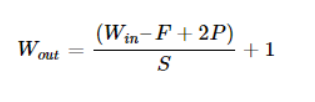

In [ ]:
# формула расчета выходного кол-ва слоев
# Wout = (Win - kernel_size + 2padding)/stride + 1 
# padding = ((Wout - 1)*stride - Win + kernel_size)/2
Wout = 6
stride = 1
Win = 6
kernel_size = 3
padding = ((Wout - 1)*stride - Win + kernel_size)/2
print(padding)

1.0


# Обучение

[1, 2000] loss: 1.875
[1, 4000] loss: 1.600
[1, 6000] loss: 1.458
[1, 8000] loss: 1.403
[1, 10000] loss: 1.311
[1, 12000] loss: 1.253
[1 epoch] val_loss: 1.188 acc: 58.199999999999996%
[2, 2000] loss: 1.181
[2, 4000] loss: 1.155
[2, 6000] loss: 1.138
[2, 8000] loss: 1.116
[2, 10000] loss: 1.080
[2, 12000] loss: 1.070
[2 epoch] val_loss: 1.096 acc: 61.660000000000004%
[3, 2000] loss: 0.993
[3, 4000] loss: 0.993
[3, 6000] loss: 0.968
[3, 8000] loss: 0.983
[3, 10000] loss: 0.974
[3, 12000] loss: 0.967
[3 epoch] val_loss: 1.063 acc: 63.72%
[4, 2000] loss: 0.902
[4, 4000] loss: 0.895
[4, 6000] loss: 0.887
[4, 8000] loss: 0.909
[4, 10000] loss: 0.893
[4, 12000] loss: 0.906
[4 epoch] val_loss: 0.961 acc: 67.45%
[5, 2000] loss: 0.815
[5, 4000] loss: 0.832
[5, 6000] loss: 0.826
[5, 8000] loss: 0.824
[5, 10000] loss: 0.832
[5, 12000] loss: 0.852
[5 epoch] val_loss: 0.941 acc: 67.67999999999999%


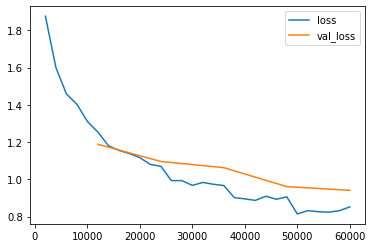

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

StartTraining(net, trainloader, valloader, optimizer, criterion, 5)

In [ ]:
torch.save(net, './CIFAR10_3_acc67.67.pt') 

[1, 2000] loss: 0.689
[1, 4000] loss: 0.658
[1, 6000] loss: 0.662
[1, 8000] loss: 0.656
[1, 10000] loss: 0.636
[1, 12000] loss: 0.638
[1 epoch] val_loss: 0.880 acc: 70.73%
[2, 2000] loss: 0.624
[2, 4000] loss: 0.623
[2, 6000] loss: 0.606
[2, 8000] loss: 0.618
[2, 10000] loss: 0.619
[2, 12000] loss: 0.606
[2 epoch] val_loss: 0.883 acc: 70.8%
[3, 2000] loss: 0.569
[3, 4000] loss: 0.603
[3, 6000] loss: 0.578
[3, 8000] loss: 0.601
[3, 10000] loss: 0.600
[3, 12000] loss: 0.611
[3 epoch] val_loss: 0.882 acc: 70.76%
[4, 2000] loss: 0.580
[4, 4000] loss: 0.585
[4, 6000] loss: 0.570
[4, 8000] loss: 0.593
[4, 10000] loss: 0.561
[4, 12000] loss: 0.588
[4 epoch] val_loss: 0.893 acc: 70.77%
[5, 2000] loss: 0.556
[5, 4000] loss: 0.573
[5, 6000] loss: 0.560
[5, 8000] loss: 0.568
[5, 10000] loss: 0.564
[5, 12000] loss: 0.562
[5 epoch] val_loss: 0.898 acc: 70.77%
[6, 2000] loss: 0.543
[6, 4000] loss: 0.566
[6, 6000] loss: 0.541
[6, 8000] loss: 0.540
[6, 10000] loss: 0.562
[6, 12000] loss: 0.565
[6 epoc

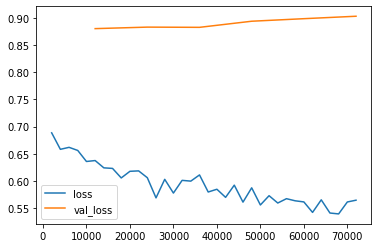

In [ ]:
#net = torch.load('./CIFAR10_2(dropout)_acc63.65.pt').to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

StartTraining(net, trainloader, valloader, optimizer, criterion, 6)

In [ ]:
torch.save(net, './CIFAR10_3.2_acc70.78.pt') 

[1, 2000] loss: 0.508
[1, 4000] loss: 0.529
[1, 6000] loss: 0.510
[1, 8000] loss: 0.543
[1, 10000] loss: 0.538
[1, 12000] loss: 0.511
[1 epoch] val_loss: 0.899 acc: 71.00999999999999%
[2, 2000] loss: 0.521
[2, 4000] loss: 0.514
[2, 6000] loss: 0.519
[2, 8000] loss: 0.521
[2, 10000] loss: 0.542
[2, 12000] loss: 0.519
[2 epoch] val_loss: 0.898 acc: 71.09%
[3, 2000] loss: 0.519
[3, 4000] loss: 0.522
[3, 6000] loss: 0.525
[3, 8000] loss: 0.517
[3, 10000] loss: 0.533
[3, 12000] loss: 0.529
[3 epoch] val_loss: 0.898 acc: 71.09%
[4, 2000] loss: 0.526
[4, 4000] loss: 0.521
[4, 6000] loss: 0.519
[4, 8000] loss: 0.528
[4, 10000] loss: 0.527
[4, 12000] loss: 0.512
[4 epoch] val_loss: 0.898 acc: 71.09%


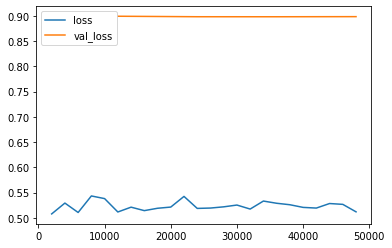

In [ ]:
net = torch.load('./CIFAR10_3.2_acc70.78.pt').to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.000001)

StartTraining(net, trainloader, valloader, optimizer, criterion, 4)

In [ ]:
torch.save(net, './CIFAR10_3.3_acc71.09.pt') 

# Тестирование

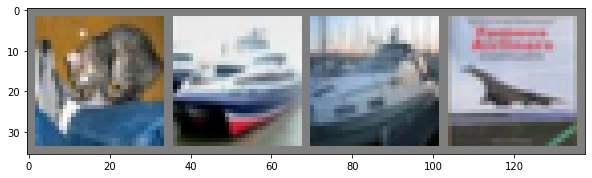

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship   cat plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        #images, labels = data
        images, labels = data[0].to(device), data[1].to(device)

        # calculate outputs by running images through the network
        outputs = net(images)
        
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in valloader:

        #images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class {classname:5s} is: {accuracy:.1f} %")

Accuracy for class plane is: 77.8 %
Accuracy for class car   is: 82.7 %
Accuracy for class bird  is: 58.2 %
Accuracy for class cat   is: 49.8 %
Accuracy for class deer  is: 69.1 %
Accuracy for class dog   is: 58.4 %
Accuracy for class frog  is: 78.7 %
Accuracy for class horse is: 74.3 %
Accuracy for class ship  is: 81.2 %
Accuracy for class truck is: 80.7 %
